Confusion Matrix:
 [[6727  576]
 [ 507  428]]


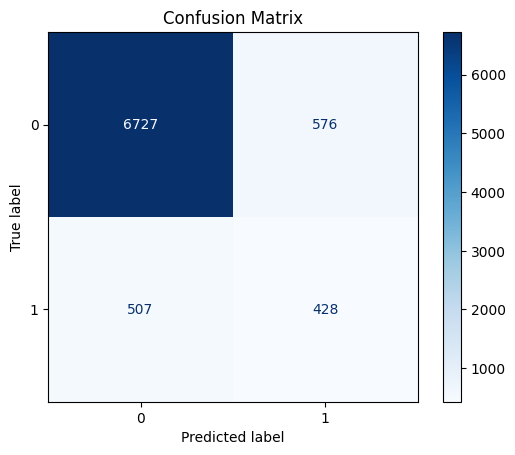

Accuracy: 0.8685360524399126
Precision: 0.4262948207171315
Recall: 0.4577540106951872


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


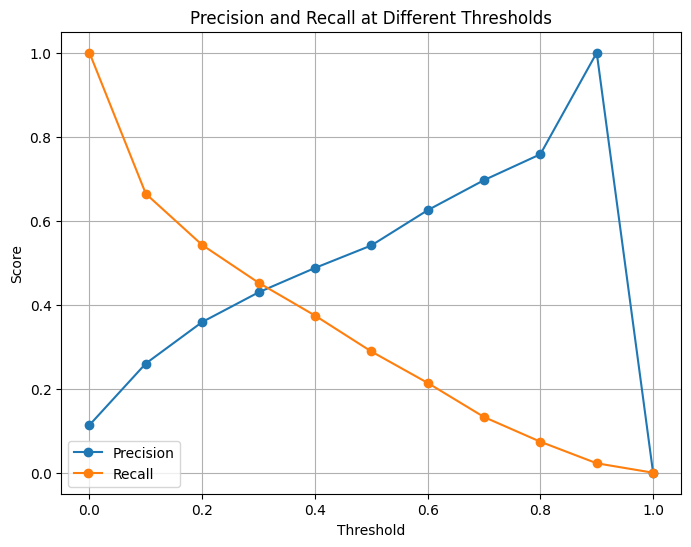

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build and Train the Random Forest Model with Class Weights
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rforest.fit(X_train, y_train)

# 4. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.3  # Lower threshold means more positives predicted
Yt = (y_proba >= threshold).astype(int)

# 5. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 6. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rforest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 7. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# 8. Visualize the Impact of Threshold on Precision and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


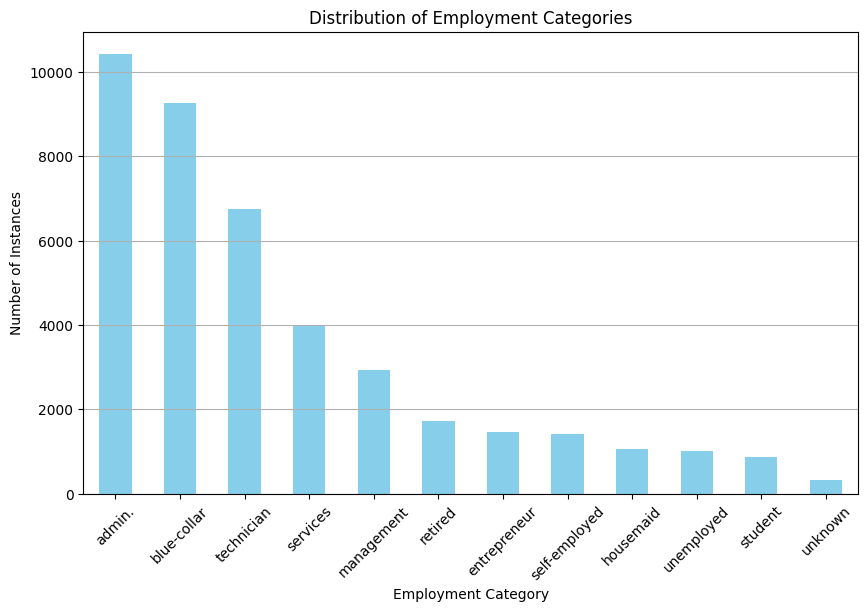

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

if 'job' in Mydata.columns:
    job_counts = Mydata['job'].value_counts()

    plt.figure(figsize=(10, 6))
    job_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Employment Category')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Employment Categories')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


The 'job' column is not present in the dataset.
Confusion Matrix:
 [[6727  576]
 [ 507  428]]


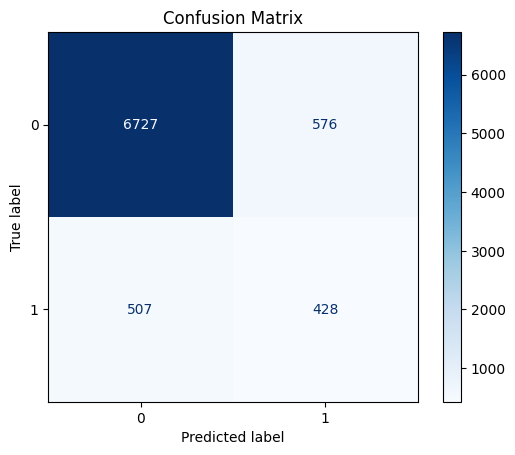

Accuracy: 0.8685360524399126
Precision: 0.4262948207171315
Recall: 0.4577540106951872


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


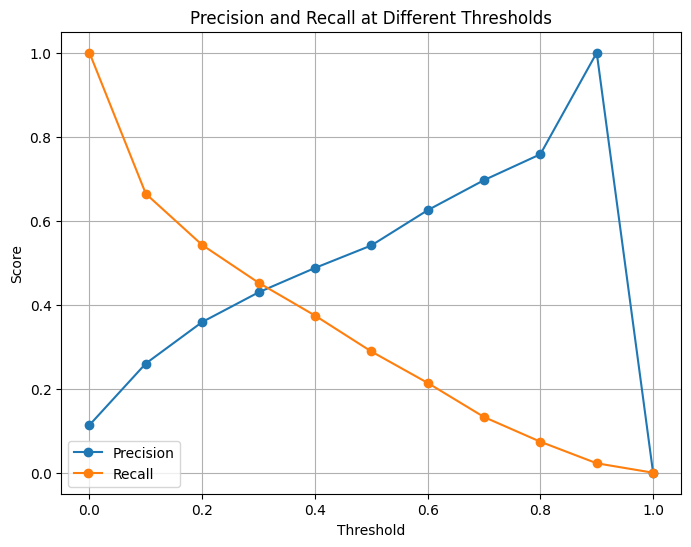

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Display the Distribution of Job Categories
# Check for job column and display its distribution
if 'job' in Mydata.columns:
    job_counts = Mydata['job'].value_counts()
    plt.figure(figsize=(10, 6))
    job_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Employment Category')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Employment Categories')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The 'job' column is not present in the dataset.")

# 3. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and Train the Random Forest Model with Class Weights
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rforest.fit(X_train, y_train)

# 5. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.3  # Lower threshold means more positives predicted
Yt = (y_proba >= threshold).astype(int)

# 6. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 7. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rforest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# 9. Visualize the Impact of Threshold on Precision and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


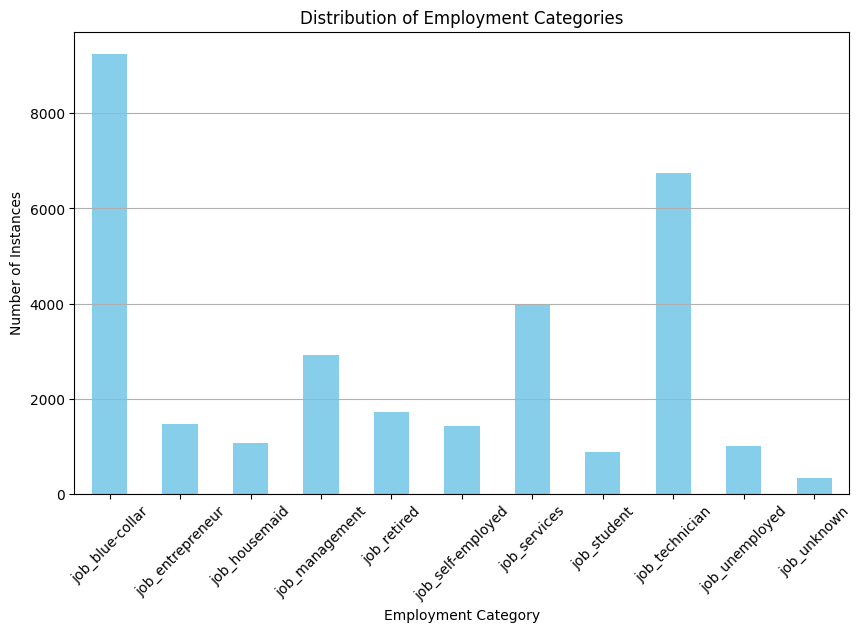

Confusion Matrix:
 [[6727  576]
 [ 507  428]]


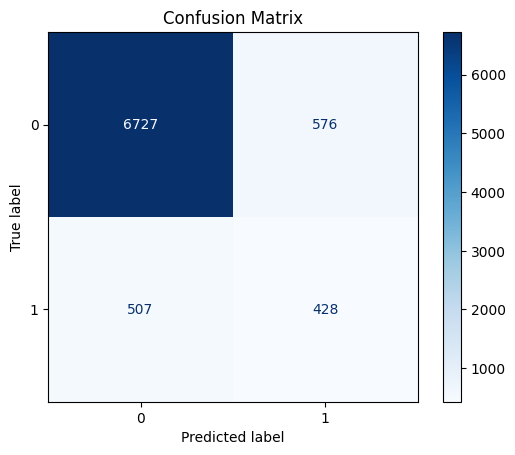

Accuracy: 0.8685360524399126
Precision: 0.4262948207171315
Recall: 0.4577540106951872


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


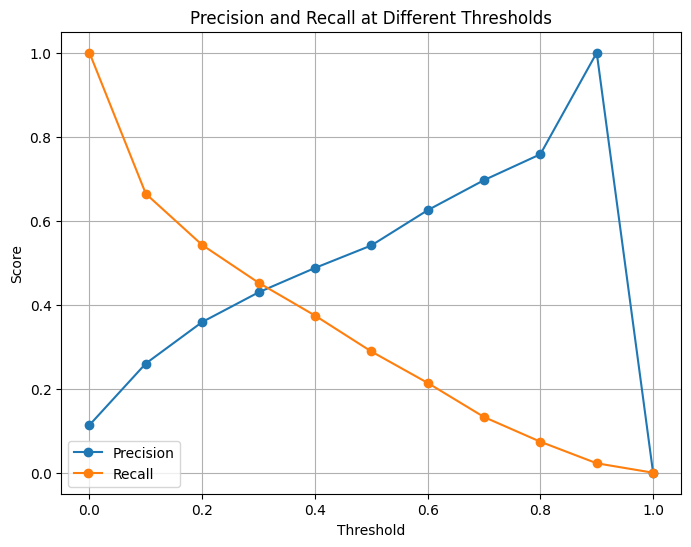

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Display the Distribution of Job Categories
# Directly assume 'job' is included after one-hot encoding; it will have been transformed to binary columns
job_columns = [col for col in Mydata.columns if 'job_' in col]  # Identify job-related columns
job_counts = Mydata[job_columns].sum()  # Sum the binary columns to get the count of each job category

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Employment Category')
plt.ylabel('Number of Instances')
plt.title('Distribution of Employment Categories')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and Train the Random Forest Model with Class Weights
rforest = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')
rforest.fit(X_train, y_train)

# 5. Make Predictions with Threshold Tuning
# Predict probabilities instead of classes
y_proba = rforest.predict_proba(X_val)[:, 1]

# Adjust the threshold for more positive predictions
threshold = 0.3  # Lower threshold means more positives predicted
Yt = (y_proba >= threshold).astype(int)

# 6. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, Yt)
print("Confusion Matrix:\n", conf_matrix)

# 7. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rforest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, Yt)
precision = precision_score(y_val, Yt)
recall = recall_score(y_val, Yt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# 9. Visualize the Impact of Threshold on Precision and Recall
thresholds = np.arange(0.0, 1.1, 0.1)
precisions = []
recalls = []
for t in thresholds:
    Yt_temp = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_val, Yt_temp))
    recalls.append(recall_score(y_val, Yt_temp))

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall at Different Thresholds')
plt.legend()
plt.grid(True)
plt.show()


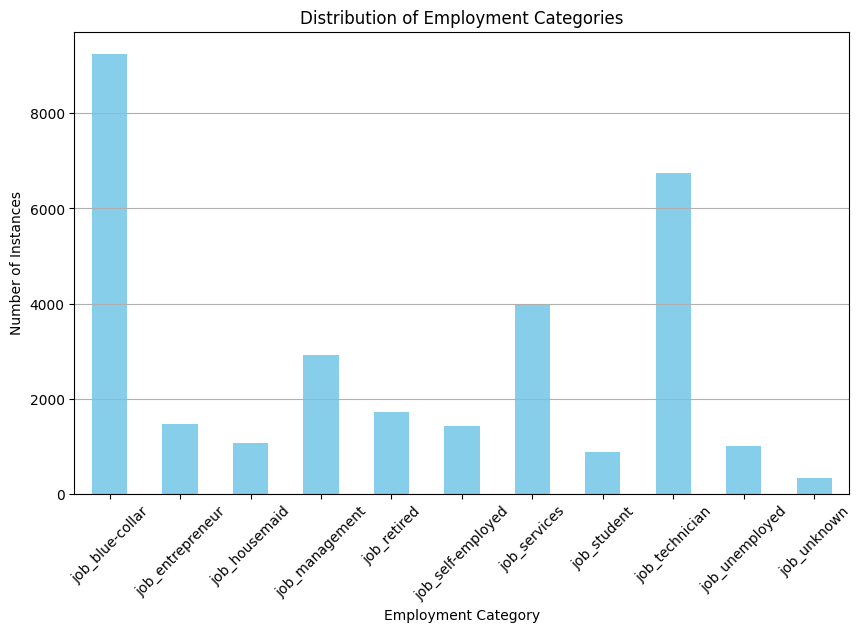

Confusion Matrix:
 [[6583  720]
 [ 619  316]]
True Positives (TP): 316
True Negatives (TN): 6583
False Positives (FP): 720
False Negatives (FN): 619


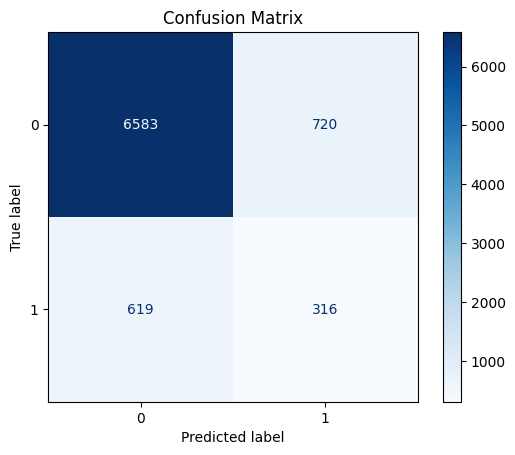

KeyboardInterrupt: 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode the target variable 'y'
Mydata['y'] = Mydata['y'].map({'yes': 1, 'no': 0})

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove unnecessary variable 'duration'
Mydata = Mydata.drop(columns=['duration'])

# 2. Display the Distribution of Job Categories
# Directly assume 'job' is included after one-hot encoding; it will have been transformed to binary columns
job_columns = [col for col in Mydata.columns if 'job_' in col]  # Identify job-related columns
job_counts = Mydata[job_columns].sum()  # Sum the binary columns to get the count of each job category

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Employment Category')
plt.ylabel('Number of Instances')
plt.title('Distribution of Employment Categories')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Train-Test Split
X = Mydata.drop(columns=['y'])
y = Mydata['y']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build and Train the Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 5. Make Predictions
y_pred = decision_tree.predict(X_val)

# 6. Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

# 7. Display the Confusion Matrix as a Graph
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 8. Print the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()

# 9. Calculate and Print Accuracy, Precision, and Recall
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


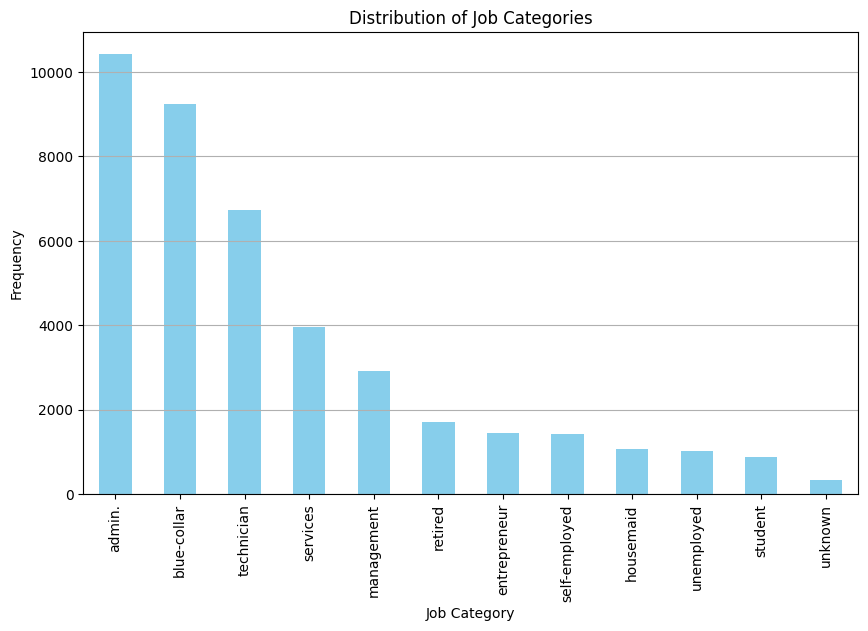

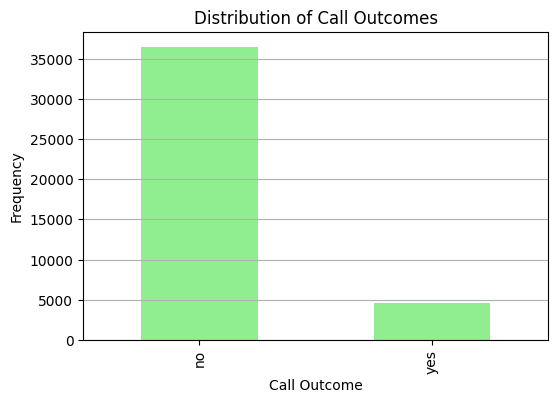

ValueError: could not convert string to float: 'blue-collar'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Plot the variable "job" from Mydata
plt.figure(figsize=(10, 6))
Mydata['job'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.title('Distribution of Job Categories')
plt.grid(axis='y')
plt.show()

# 3. Plot the call outcome "y" from Mydata
plt.figure(figsize=(6, 4))
Mydata['y'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Call Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Call Outcomes')
plt.grid(axis='y')
plt.show()

# 4. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 5. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42)

# 6. Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
mtree = DecisionTreeClassifier(random_state=42)
mtree.fit(Train.drop(columns=['y']), Train['y'])

# 7. Display the tree structure
plt.figure(figsize=(20, 10))
plot_tree(mtree, filled=True, feature_names=Train.columns[:-1], class_names=mtree.classes_)
plt.title("Decision Tree Visualization")
plt.show()

# 8. Predict on the validation data
Yt = mtree.predict(Val.drop(columns=['y']))

# 9. Confusion Matrix
conf_matrix = confusion_matrix(Val['y'], Yt)
print("Confusion Matrix:\n", conf_matrix)

# Naming rows and columns as in R
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual:{cls}" for cls in mtree.classes_], 
                              columns=[f"Pred:{cls}" for cls in mtree.classes_])
print(conf_matrix_df)

# 10. Accuracy
ac = accuracy_score(Val['y'], Yt)
print(f"Accuracy: {ac}")

# 11. True Positive Rate (TP) and True Negative Rate (TN)
tp = conf_matrix[1, 1] / sum(conf_matrix[1, :])  # True Positive Rate
tn = conf_matrix[0, 0] / sum(conf_matrix[0, :])  # True Negative Rate
print(f"True Positive Rate (TP): {tp}")
print(f"True Negative Rate (TN): {tn}")


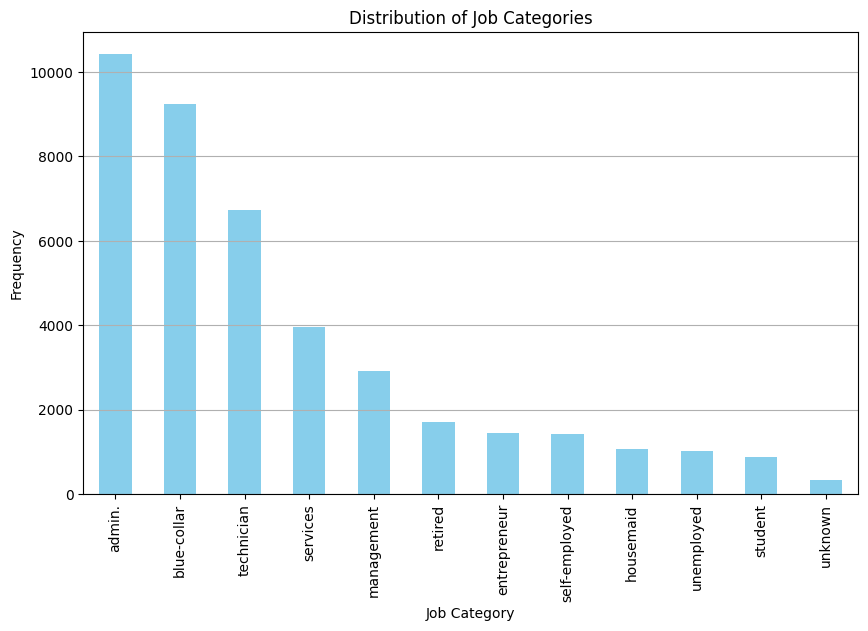

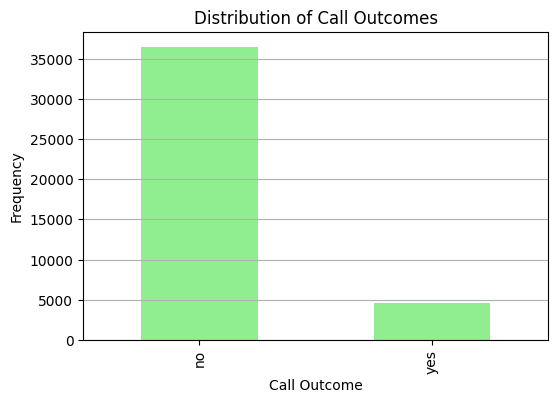

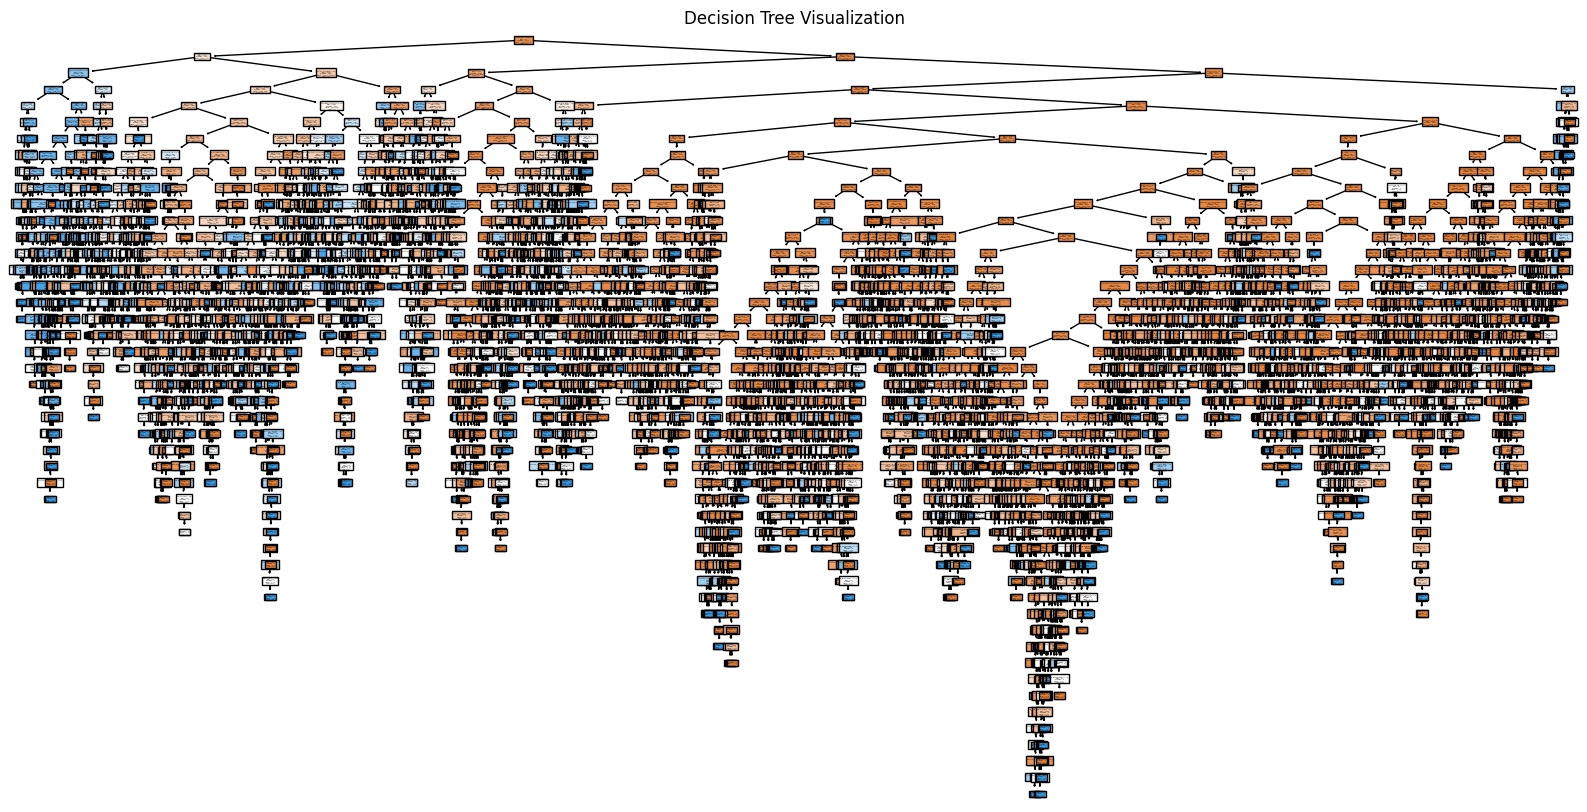

Confusion Matrix:
 [[6583  720]
 [ 619  316]]
            Pred:No  Pred:Yes
Actual:No      6583       720
Actual:Yes      619       316
Accuracy: 0.8374605486768634
True Positive Rate (TP): 0.33796791443850266
True Negative Rate (TN): 0.9014103792961796


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Plot the variable "job" from Mydata
plt.figure(figsize=(10, 6))
Mydata['job'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.title('Distribution of Job Categories')
plt.grid(axis='y')
plt.show()

# 3. Plot the call outcome "y" from Mydata
plt.figure(figsize=(6, 4))
Mydata['y'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Call Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Call Outcomes')
plt.grid(axis='y')
plt.show()

# 4. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 5. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 6. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 7. Decision Tree Model
mtree = DecisionTreeClassifier(random_state=42)
mtree.fit(Train.drop(columns=['y_yes']), Train['y_yes'])

# 8. Display the tree structure
plt.figure(figsize=(20, 10))
plot_tree(mtree, filled=True, feature_names=Train.columns[:-1], class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()

# 9. Predict on the validation data
Yt = mtree.predict(Val.drop(columns=['y_yes']))

# 10. Confusion Matrix
conf_matrix = confusion_matrix(Val['y_yes'], Yt)
print("Confusion Matrix:\n", conf_matrix)

# Naming rows and columns as in R
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual:{cls}" for cls in ['No', 'Yes']], 
                              columns=[f"Pred:{cls}" for cls in ['No', 'Yes']])
print(conf_matrix_df)

# 11. Accuracy
ac = accuracy_score(Val['y_yes'], Yt)
print(f"Accuracy: {ac}")

# 12. True Positive Rate (TP) and True Negative Rate (TN)
tp = conf_matrix[1, 1] / sum(conf_matrix[1, :])  # True Positive Rate
tn = conf_matrix[0, 0] / sum(conf_matrix[0, :])  # True Negative Rate
print(f"True Positive Rate (TP): {tp}")
print(f"True Negative Rate (TN): {tn}")


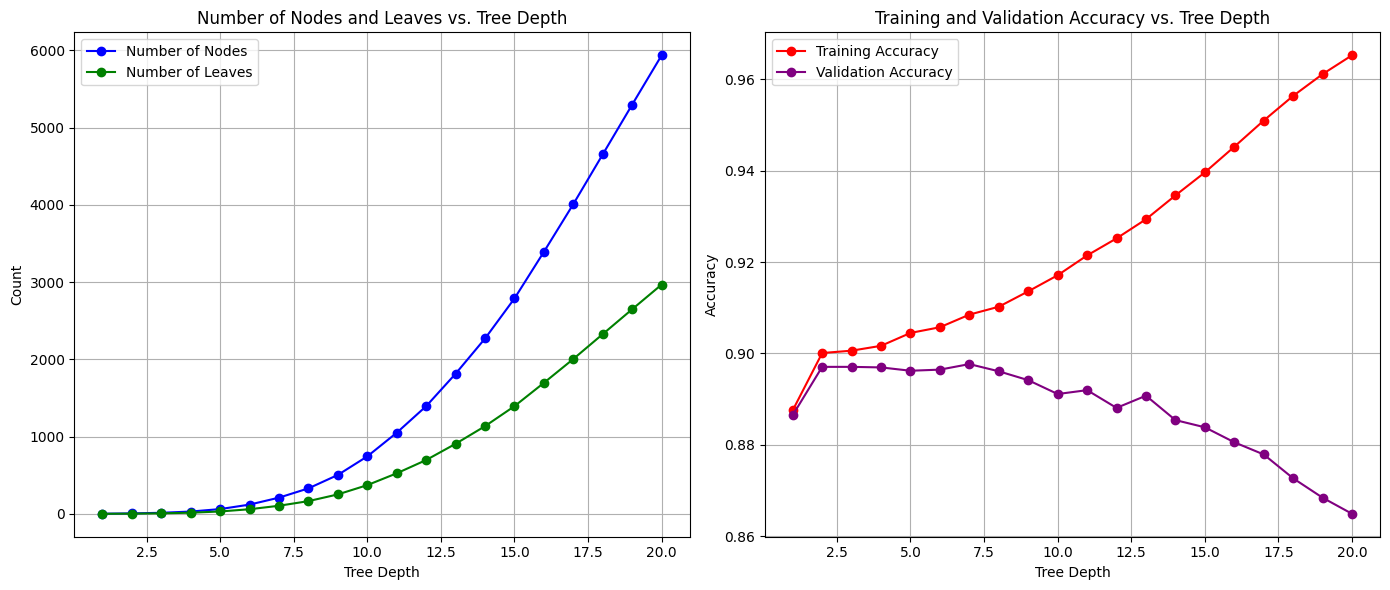

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# 1. Load the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove the 'duration' column as it is not predictive
Mydata = Mydata.drop(columns=['duration'])

# Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42)

# 2. Train Decision Tree with Different Max Depths
depths = range(1, 21)  # Testing tree depths from 1 to 20
num_nodes = []
num_leaves = []
train_accuracies = []
val_accuracies = []

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
    
    # Complexity metrics
    num_nodes.append(dtree.tree_.node_count)
    num_leaves.append(dtree.get_n_leaves())
    
    # Performance metrics
    train_accuracy = dtree.score(Train.drop(columns=['y_yes']), Train['y_yes'])
    val_accuracy = dtree.score(Val.drop(columns=['y_yes']), Val['y_yes'])
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# 3. Plot Complexity Metrics
plt.figure(figsize=(14, 6))

# Number of Nodes vs. Depth
plt.subplot(1, 2, 1)
plt.plot(depths, num_nodes, marker='o', color='blue', label='Number of Nodes')
plt.plot(depths, num_leaves, marker='o', color='green', label='Number of Leaves')
plt.xlabel('Tree Depth')
plt.ylabel('Count')
plt.title('Number of Nodes and Leaves vs. Tree Depth')
plt.legend()
plt.grid(True)

# Accuracy vs. Depth
plt.subplot(1, 2, 2)
plt.plot(depths, train_accuracies, marker='o', color='red', label='Training Accuracy')
plt.plot(depths, val_accuracies, marker='o', color='purple', label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Tree Depth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Number of Nodes: 5
Number of Leaves: 3
Tree Depth: 2
Training Accuracy: 0.9001
Validation Accuracy: 0.8971


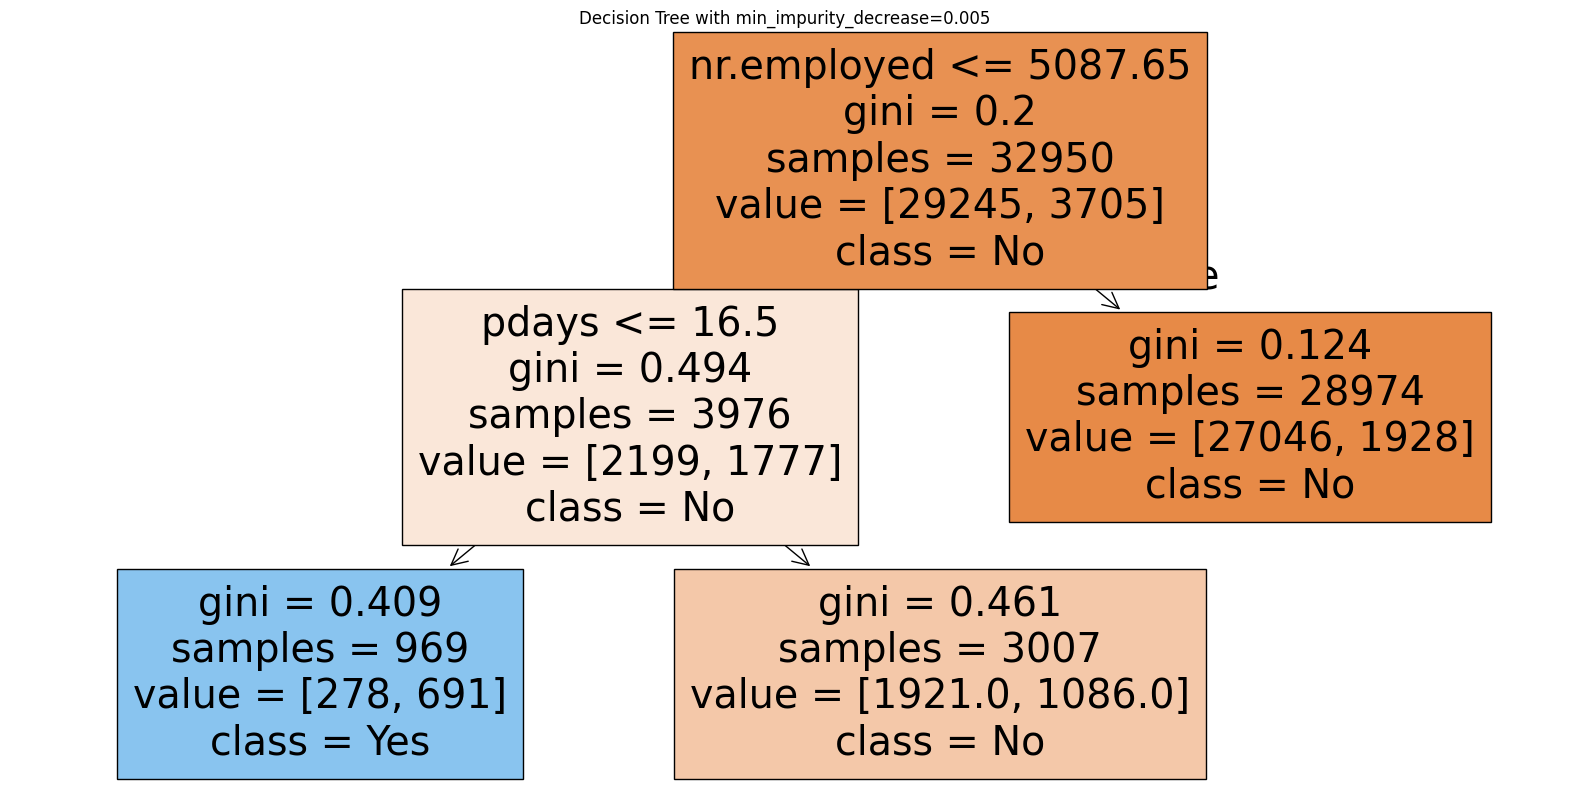

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# Encode categorical variables using one-hot encoding
Mydata = pd.get_dummies(Mydata, drop_first=True)

# Remove the 'duration' column as it is not predictive
Mydata = Mydata.drop(columns=['duration'])

# Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata, test_size=0.2, random_state=42)

# 2. Train Decision Tree with min_impurity_decrease = 0.005
dtree = DecisionTreeClassifier(min_impurity_decrease=0.005, random_state=42)
dtree.fit(Train.drop(columns=['y_yes']), Train['y_yes'])

# 3. Analyze Tree Complexity
num_nodes = dtree.tree_.node_count
num_leaves = dtree.get_n_leaves()
tree_depth = dtree.get_depth()

# 4. Evaluate Model Performance
y_train_pred = dtree.predict(Train.drop(columns=['y_yes']))
y_val_pred = dtree.predict(Val.drop(columns=['y_yes']))

train_accuracy = accuracy_score(Train['y_yes'], y_train_pred)
val_accuracy = accuracy_score(Val['y_yes'], y_val_pred)

# 5. Print Complexity Metrics and Performance
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Leaves: {num_leaves}")
print(f"Tree Depth: {tree_depth}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 6. Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, filled=True, feature_names=Train.columns[:-1], class_names=["No", "Yes"])
plt.title("Decision Tree with min_impurity_decrease=0.005")
plt.show()


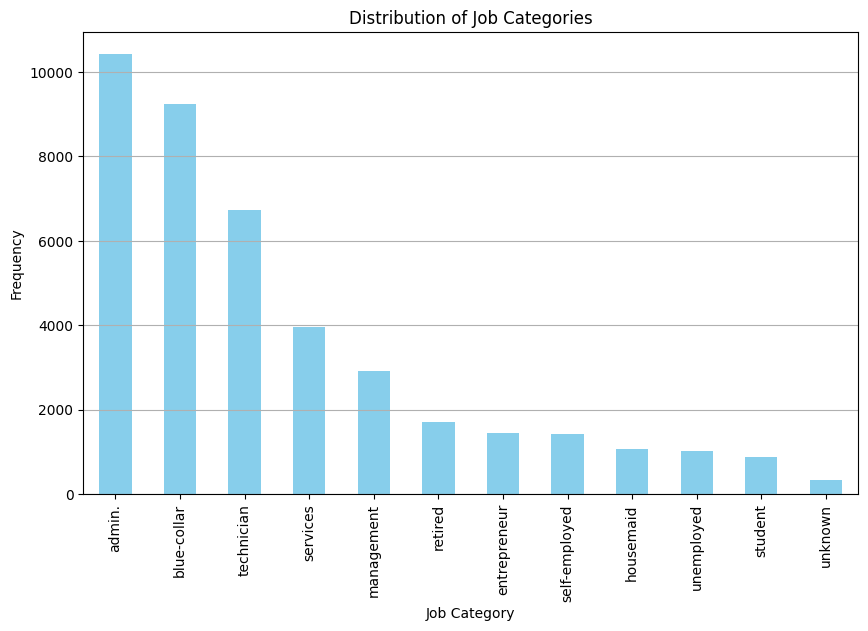

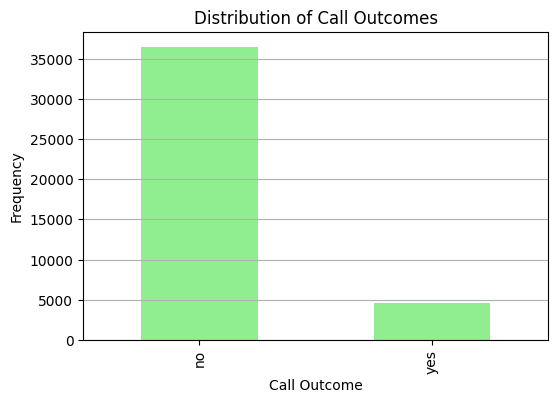

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


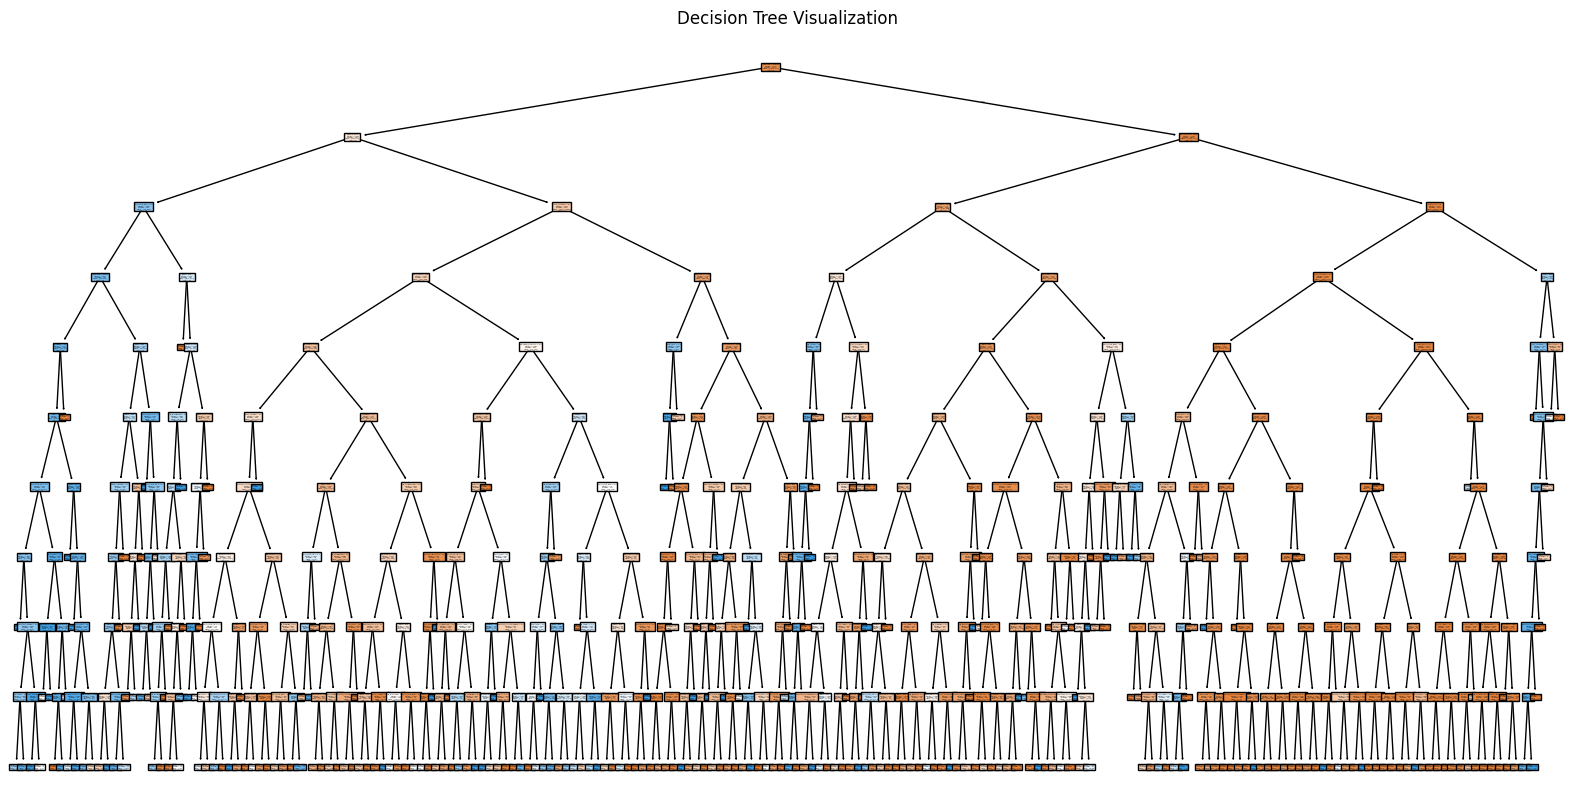

Confusion Matrix:
 [[7054  249]
 [ 653  282]]
            Pred:No  Pred:Yes
Actual:No      7054       249
Actual:Yes      653       282
Accuracy: 0.890507404709881
Cross-Validation Accuracy Scores: [0.8873513  0.34826414 0.65926196 0.13900692 0.14349885]
Mean Cross-Validation Accuracy: 0.4354766328178359
Confusion Matrix (Random Forest):
 [[7073  230]
 [ 660  275]]
            Pred:No  Pred:Yes
Actual:No      7073       230
Actual:Yes      660       275
Accuracy (Random Forest): 0.891964068948774
True Positive Rate (TP) (Random Forest): 0.29411764705882354
True Negative Rate (TN) (Random Forest): 0.9685060933862796


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Plot the variable "job" from Mydata
plt.figure(figsize=(10, 6))
Mydata['job'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.title('Distribution of Job Categories')
plt.grid(axis='y')
plt.show()

# 3. Plot the call outcome "y" from Mydata
plt.figure(figsize=(6, 4))
Mydata['y'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Call Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Call Outcomes')
plt.grid(axis='y')
plt.show()

# 4. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 5. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 6. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 7. Decision Tree Model with Hyperparameter Tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(Train.drop(columns=['y_yes']), Train['y_yes'])

print("Best parameters found: ", grid_search.best_params_)

# 8. Train the best model
best_tree = grid_search.best_estimator_

# 9. Display the tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=Train.drop(columns=['y_yes']).columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()

# 10. Predict on the validation data
Yt = best_tree.predict(Val.drop(columns=['y_yes']))

# 11. Confusion Matrix
conf_matrix = confusion_matrix(Val['y_yes'], Yt)
print("Confusion Matrix:\n", conf_matrix)

# Naming rows and columns as in R
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f"Actual:{cls}" for cls in ['No', 'Yes']], 
                              columns=[f"Pred:{cls}" for cls in ['No', 'Yes']])
print(conf_matrix_df)

# 12. Accuracy
ac = accuracy_score(Val['y_yes'], Yt)
print(f"Accuracy: {ac}")

# 13. Cross-Validation Score
cv_scores = cross_val_score(best_tree, Mydata_encoded.drop(columns=['y_yes']), Mydata_encoded['y_yes'], cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}")

# 14. Ensemble Method: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(Train.drop(columns=['y_yes']), Train['y_yes'])

# 15. Predict on the validation data using Random Forest
Yt_rf = rf.predict(Val.drop(columns=['y_yes']))

# 16. Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(Val['y_yes'], Yt_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Naming rows and columns as in R for Random Forest
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, 
                                 index=[f"Actual:{cls}" for cls in ['No', 'Yes']], 
                                 columns=[f"Pred:{cls}" for cls in ['No', 'Yes']])
print(conf_matrix_rf_df)

# 17. Accuracy for Random Forest
ac_rf = accuracy_score(Val['y_yes'], Yt_rf)
print(f"Accuracy (Random Forest): {ac_rf}")

# 18. True Positive Rate (TP) and True Negative Rate (TN) for Random Forest
tp_rf = conf_matrix_rf[1, 1] / sum(conf_matrix_rf[1, :])  # True Positive Rate
tn_rf = conf_matrix_rf[0, 0] / sum(conf_matrix_rf[0, :])  # True Negative Rate
print(f"True Positive Rate (TP) (Random Forest): {tp_rf}")
print(f"True Negative Rate (TN) (Random Forest): {tn_rf}")


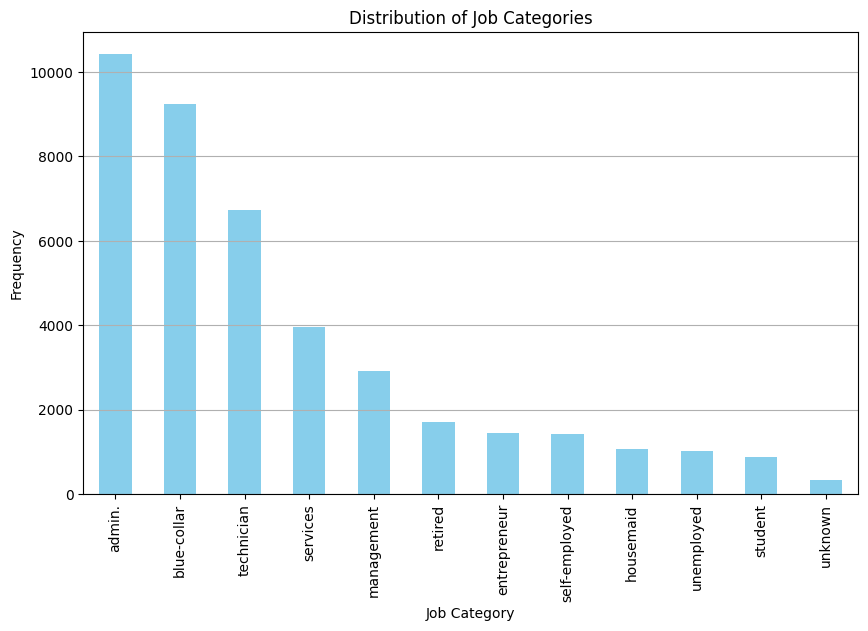

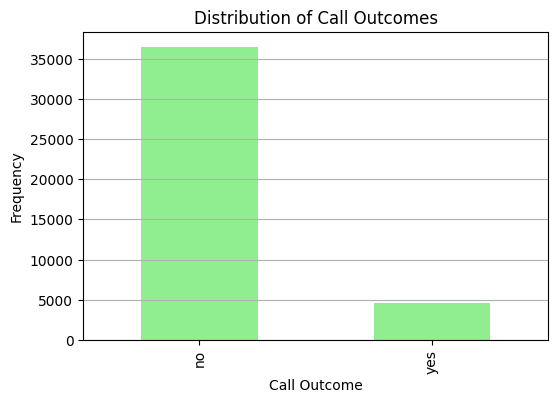

Evaluating Decision Tree Classifier...

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.8905
Confusion Matrix:
             Pred:No  Pred:Yes
Actual:No      7054       249
Actual:Yes      653       282
True Positive Rate (TP): 0.3016
True Negative Rate (TN): 0.9659

Evaluating Random Forest Classifier...



KeyboardInterrupt: 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Plot the variable "job" from Mydata
plt.figure(figsize=(10, 6))
Mydata['job'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.title('Distribution of Job Categories')
plt.grid(axis='y')
plt.show()

# 3. Plot the call outcome "y" from Mydata
plt.figure(figsize=(6, 4))
Mydata['y'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Call Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Call Outcomes')
plt.grid(axis='y')
plt.show()

# 4. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 5. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 6. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 7. Function to evaluate different models
def evaluate_model(model, params, Train, Val):
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
    
    best_model = grid_search.best_estimator_
    print("Best parameters found: ", grid_search.best_params_)
    
    Yt = best_model.predict(Val.drop(columns=['y_yes']))
    ac = accuracy_score(Val['y_yes'], Yt)
    print(f"Accuracy: {ac:.4f}")
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(Val['y_yes'], Yt)
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=[f"Actual:{cls}" for cls in ['No', 'Yes']], 
                                  columns=[f"Pred:{cls}" for cls in ['No', 'Yes']])
    print("Confusion Matrix:\n", conf_matrix_df)
    
    # True Positive Rate (TP) and True Negative Rate (TN)
    tp = conf_matrix[1, 1] / sum(conf_matrix[1, :])  # True Positive Rate
    tn = conf_matrix[0, 0] / sum(conf_matrix[0, :])  # True Negative Rate
    print(f"True Positive Rate (TP): {tp:.4f}")
    print(f"True Negative Rate (TN): {tn:.4f}")
    
    return best_model

# 8. Decision Tree with various hyperparameters
print("Evaluating Decision Tree Classifier...\n")
dtree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
best_tree = evaluate_model(DecisionTreeClassifier(random_state=42), dtree_params, Train, Val)

# 9. Random Forest with various hyperparameters
print("\nEvaluating Random Forest Classifier...\n")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
best_rf = evaluate_model(RandomForestClassifier(random_state=42), rf_params, Train, Val)

# 10. Plot the best Decision Tree structure (if it is small)
if hasattr(best_tree, 'tree_') and best_tree.tree_.node_count < 100:
    plt.figure(figsize=(20, 10))
    plot_tree(best_tree, filled=True, feature_names=Train.drop(columns=['y_yes']).columns, class_names=['No', 'Yes'])
    plt.title("Decision Tree Visualization")
    plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Function to evaluate models with different parameters
def evaluate_model(model, param_grid, Train, Val):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
    
    best_model = grid_search.best_estimator_
    print("Best parameters found: ", grid_search.best_params_)
    
    Yt = best_model.predict(Val.drop(columns=['y_yes']))
    ac = accuracy_score(Val['y_yes'], Yt)
    print(f"Accuracy: {ac:.4f}\n")
    
    return ac

# 6. Decision Tree parameters
dtree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

print("Evaluating Decision Tree Classifier...\n")
dtree_accuracies = {}
for params in [dtree_params]:
    ac = evaluate_model(DecisionTreeClassifier(random_state=42), params, Train, Val)
    dtree_accuracies[str(params)] = ac

# 7. Random Forest parameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

print("Evaluating Random Forest Classifier...\n")
rf_accuracies = {}
for params in [rf_params]:
    ac = evaluate_model(RandomForestClassifier(random_state=42), params, Train, Val)
    rf_accuracies[str(params)] = ac

# Print all accuracies
print("Decision Tree Accuracies:")
for params, accuracy in dtree_accuracies.items():
    print(f"Parameters: {params} - Accuracy: {accuracy:.4f}")

print("\nRandom Forest Accuracies:")
for params, accuracy in rf_accuracies.items():
    print(f"Parameters: {params} - Accuracy: {accuracy:.4f}")


Evaluating Decision Tree Classifier...

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.8905

Evaluating Random Forest Classifier...

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8971

Decision Tree Accuracies:
Parameters: {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]} - Accuracy: 0.8905

Random Forest Accuracies:
Parameters: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]} - Accuracy: 0.8971


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# Define parameters
depths = [None, 5, 10, 15, 20]
splits = [2, 5, 10]

# Evaluate Decision Tree
print("Decision Tree Results:")
for depth in depths:
    for split in splits:
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        tree.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
        predictions = tree.predict(Val.drop(columns=['y_yes']))
        accuracy = accuracy_score(Val['y_yes'], predictions)
        print(f"max_depth={depth}, min_samples_split={split} - Accuracy: {accuracy:.4f}")

# Evaluate Random Forest
n_estimators = [50, 100, 200]
print("\nRandom Forest Results:")
for depth in depths:
    for split in splits:
        for n in n_estimators:
            rf = RandomForestClassifier(max_depth=depth, min_samples_split=split, n_estimators=n, random_state=42)
            rf.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
            predictions = rf.predict(Val.drop(columns=['y_yes']))
            accuracy = accuracy_score(Val['y_yes'], predictions)
            print(f"max_depth={depth}, min_samples_split={split}, n_estimators={n} - Accuracy: {accuracy:.4f}")


Decision Tree Results:
max_depth=None, min_samples_split=2 - Accuracy: 0.8375
max_depth=None, min_samples_split=5 - Accuracy: 0.8593
max_depth=None, min_samples_split=10 - Accuracy: 0.8706
max_depth=5, min_samples_split=2 - Accuracy: 0.8962
max_depth=5, min_samples_split=5 - Accuracy: 0.8962
max_depth=5, min_samples_split=10 - Accuracy: 0.8962
max_depth=10, min_samples_split=2 - Accuracy: 0.8911
max_depth=10, min_samples_split=5 - Accuracy: 0.8904
max_depth=10, min_samples_split=10 - Accuracy: 0.8923
max_depth=15, min_samples_split=2 - Accuracy: 0.8838
max_depth=15, min_samples_split=5 - Accuracy: 0.8827
max_depth=15, min_samples_split=10 - Accuracy: 0.8844
max_depth=20, min_samples_split=2 - Accuracy: 0.8649
max_depth=20, min_samples_split=5 - Accuracy: 0.8735
max_depth=20, min_samples_split=10 - Accuracy: 0.8790

Random Forest Results:
max_depth=None, min_samples_split=2, n_estimators=50 - Accuracy: 0.8921
max_depth=None, min_samples_split=2, n_estimators=100 - Accuracy: 0.8920
max_d

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)
# 5. Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
rf.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
# 6. Make predictions on the validation data
Yt = rf.predict(Val.drop(columns=['y_yes']))
# 7. Calculate accuracy
accuracy = accuracy_score(Val['y_yes'], Yt)
print(f"Accuracy: {accuracy:.4f}")
# 8. Print confusion matrix
conf_matrix = confusion_matrix(Val['y_yes'], Yt)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Pred: No', 'Pred: Yes'])
print("Confusion Matrix:\n", conf_matrix_df)


Accuracy: 0.8920
Confusion Matrix:
              Pred: No  Pred: Yes
Actual: No       7073        230
Actual: Yes       660        275


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}
# 6. Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)
# 7. Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# 8. Fit GridSearchCV
grid_search.fit(Train.drop(columns=['y_yes']), Train['y_yes'])
# 9. Get the best model from grid search
best_rf = grid_search.best_estimator_
# 10. Make predictions with the best model
Yt = best_rf.predict(Val.drop(columns=['y_yes']))
# 11. Calculate accuracy
accuracy = accuracy_score(Val['y_yes'], Yt)
print(f"Best Model Accuracy: {accuracy:.4f}")
# 12. Print confusion matrix
conf_matrix = confusion_matrix(Val['y_yes'], Yt)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Pred: No', 'Pred: Yes'])
print("Confusion Matrix:\n", conf_matrix_df)
# 13. Print best hyperparameters
print("Best Hyperparameters:\n", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Model Accuracy: 0.8971
Confusion Matrix:
              Pred: No  Pred: Yes
Actual: No       7186        117
Actual: Yes       731        204
Best Hyperparameters:
 {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Prepare features and target
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']
# 6. Initialize and train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
# 7. Make predictions
y_pred_lr = lr.predict(X_val)
# 8. Evaluate and print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", pd.DataFrame(conf_matrix, index=['Actual: No', 'Actual: Yes'], columns=['Pred: No', 'Pred: Yes']))
 
    print("Classification Report:\n", class_report)

print_metrics("Logistic Regression", y_val, y_pred_lr)



Logistic Regression Performance:
Accuracy: 0.8965
Confusion Matrix:
              Pred: No  Pred: Yes
Actual: No       7186        117
Actual: Yes       736        199
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7303
        True       0.63      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Prepare features and target
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']

# 6. Initialize and train XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0,
    lambda=1,
    random_state=42
)
xgb.fit(X_train, y_train)

# 7. Make predictions
y_pred_xgb = xgb.predict(X_val)

# 8. Evaluate and print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", pd.DataFrame(conf_matrix, index=['Actual: No', 'Actual: Yes'], columns=['Pred: No', 'Pred: Yes']))
    print("Classification Report:\n", class_report)

print_metrics("XGBoost", y_val, y_pred_xgb)


SyntaxError: invalid syntax (1255222841.py, line 32)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Prepare features and target
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']
# 6. Initialize and train XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0,
    reg_lambda=1,  # Changed from lambda to reg_lambda
    random_state=42
)
xgb.fit(X_train, y_train)
# 7. Make predictions
y_pred_xgb = xgb.predict(X_val)
# 8. Evaluate and print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred) 
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", pd.DataFrame(conf_matrix, index=['Actual: No', 'Actual: Yes'], columns=['Pred: No', 'Pred: Yes']))
    
    print("Classification Report:\n", class_report)

print_metrics("XGBoost", y_val, y_pred_xgb)



XGBoost Performance:
Accuracy: 0.8975
Confusion Matrix:
              Pred: No  Pred: Yes
Actual: No       7153        150
Actual: Yes       694        241
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.98      0.94      7303
        True       0.62      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Read the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Remove the variable "duration"
Mydata = Mydata.drop(columns=['duration'])

# 3. Apply one-hot encoding to categorical features
Mydata_encoded = pd.get_dummies(Mydata, drop_first=True)

# 4. Split data into training (80%) and validation (20%)
Train, Val = train_test_split(Mydata_encoded, test_size=0.2, random_state=42)

# 5. Prepare features and target
X_train = Train.drop(columns=['y_yes'])
y_train = Train['y_yes']
X_val = Val.drop(columns=['y_yes'])
y_val = Val['y_yes']
# 6. Initialize and train AdaBoost model
base_classifier = DecisionTreeClassifier(max_depth=1)  # Decision stump
ada = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
# 7. Make predictions
y_pred_ada = ada.predict(X_val)
# 8. Evaluate and print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance:")
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", pd.DataFrame(conf_matrix, index=['Actual: No', 'Actual: Yes'], columns=['Pred: No', 'Pred: Yes']))
    print("Classification Report:\n", class_report)

print_metrics("AdaBoost", y_val, y_pred_ada)


c:\Users\vyasj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Performance:
Accuracy: 0.8969
Confusion Matrix:
              Pred: No  Pred: Yes
Actual: No       7200        103
Actual: Yes       746        189
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.99      0.94      7303
        True       0.65      0.20      0.31       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



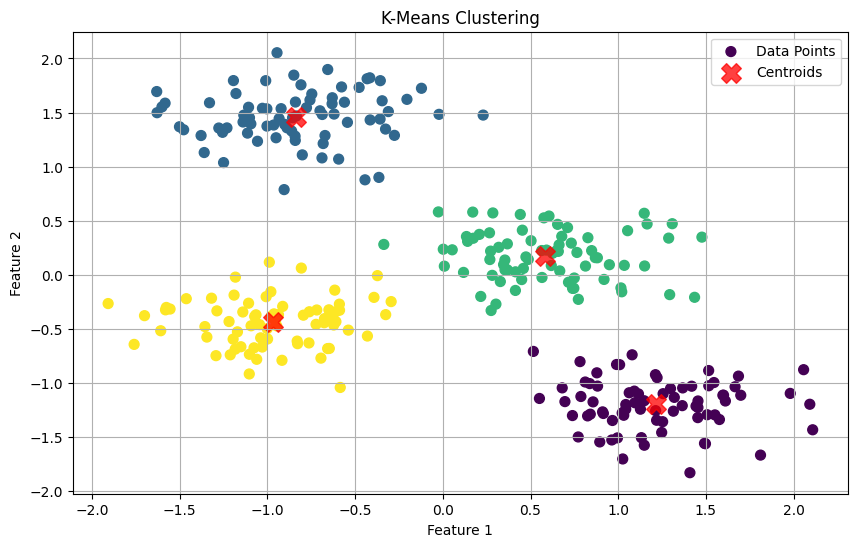

Silhouette Score: 0.6569


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 1. Load and preprocess data
# For this example, we will generate synthetic data
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Initialize KMeans and fit the model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# 3. Predict cluster labels
labels = kmeans.predict(X_scaled)
centroids = kmeans.cluster_centers_
# 4. Plot the clusters and centroids
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()
# 5. Evaluate the clustering with silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')


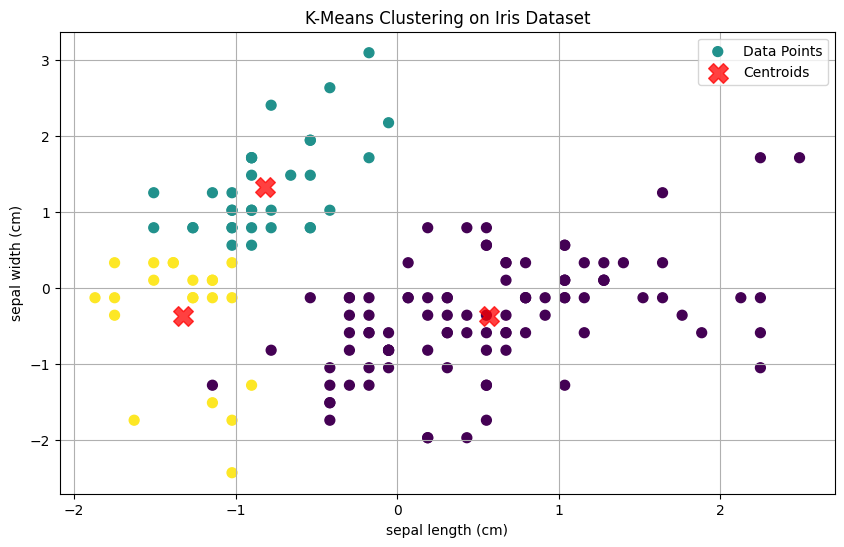

In [25]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
centroids = kmeans.cluster_centers_

# 4. Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
import pandas as pd
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Create a DataFrame for better readability
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['species'] = target_names[y]

# 3. Display the first few rows of the DataFrame
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


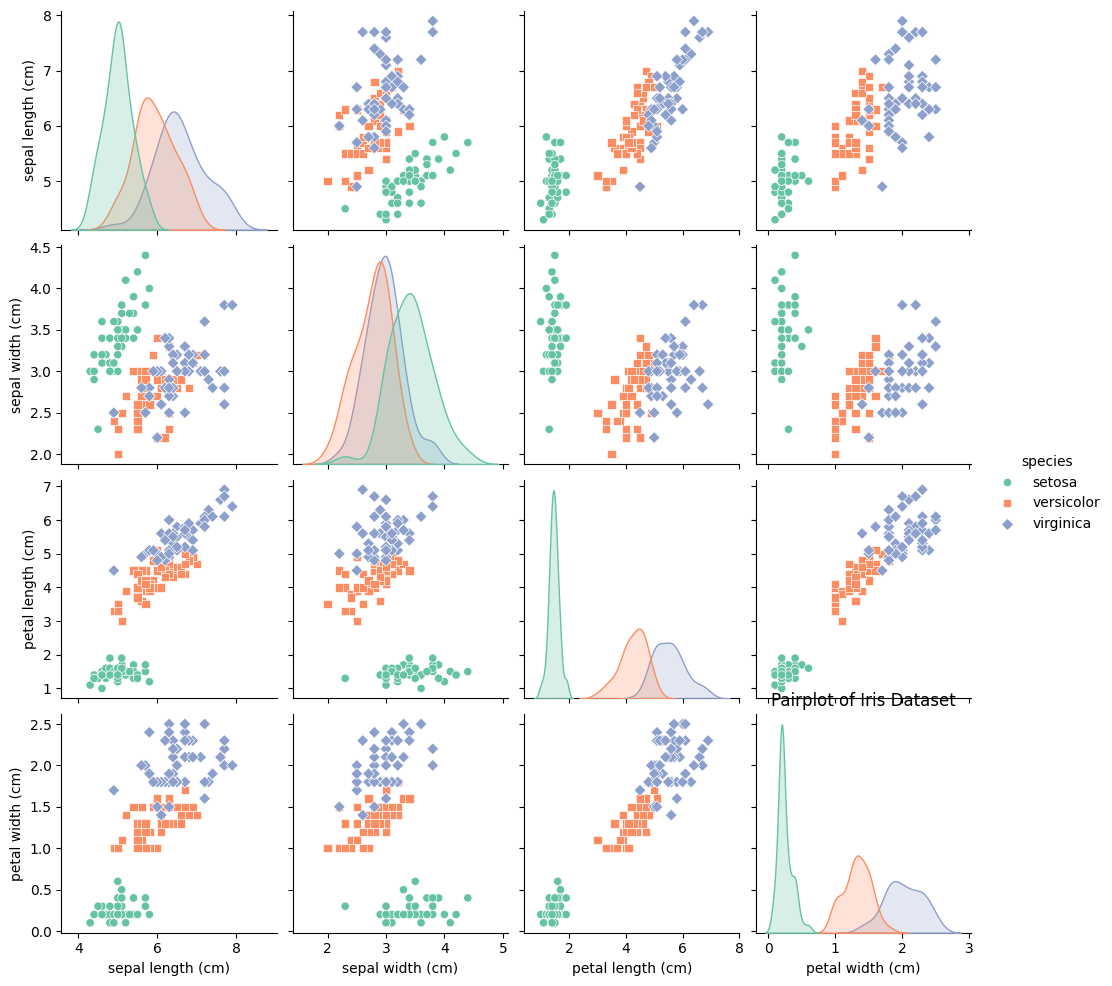

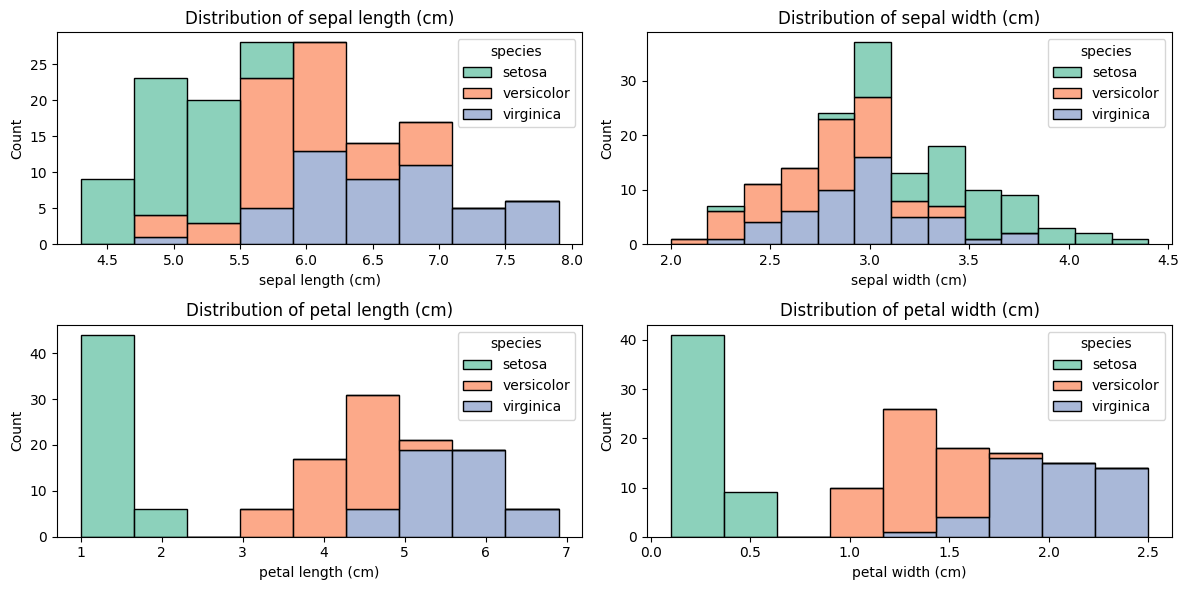

C:\Users\vyasj\AppData\Local\Temp\ipykernel_10972\2008175722.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', palette='Set2')


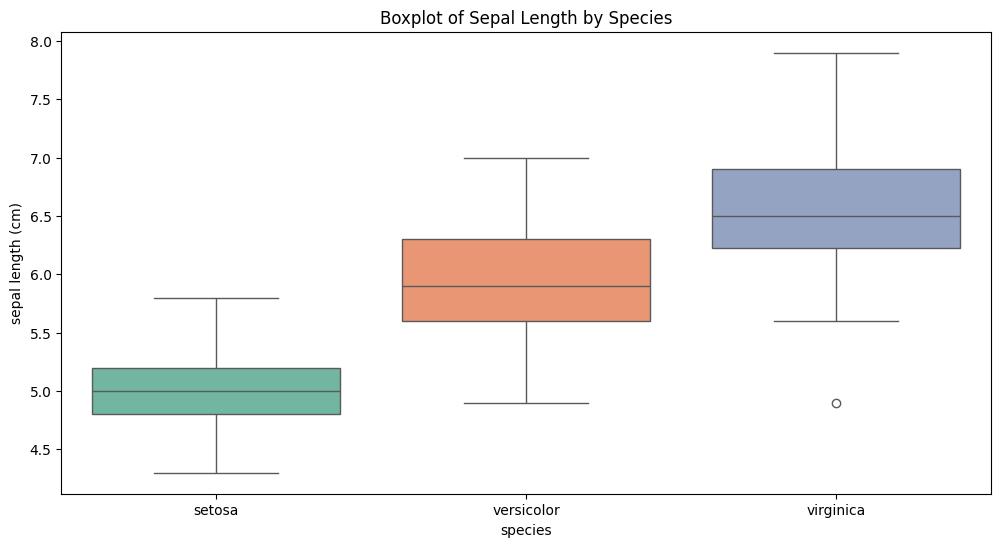

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Create a DataFrame for better readability
iris_df = pd.DataFrame(data=X, columns=feature_names)
iris_df['species'] = [target_names[i] for i in y]

# 3. Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species', palette='Set2', markers=["o", "s", "D"])
plt.title('Pairplot of Iris Dataset')
plt.show()

# 4. Distribution plot for each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=iris_df, x=feature, hue='species', multiple='stack', palette='Set2')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 5. Boxplot to visualize the distribution of features
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df, x='species', y='sepal length (cm)', palette='Set2')
plt.title('Boxplot of Sepal Length by Species')
plt.show()


First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

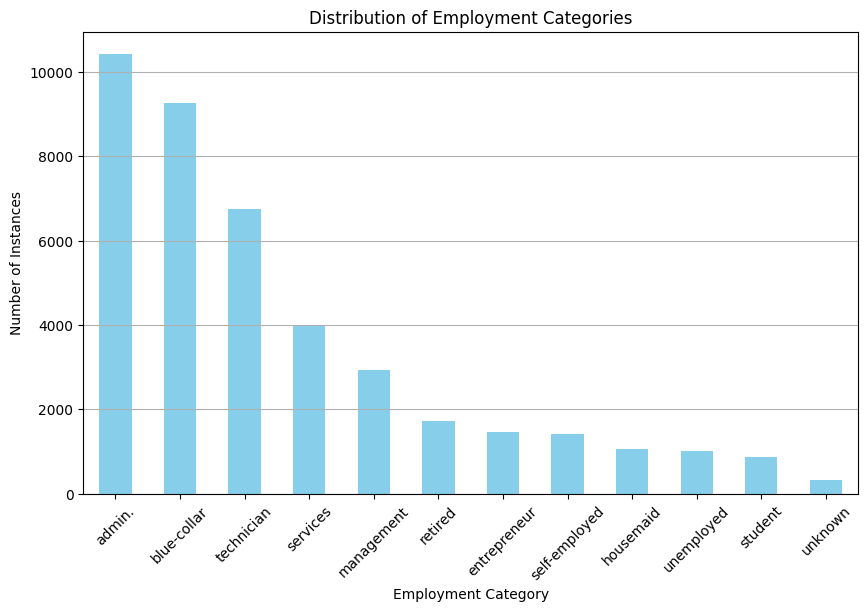

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read and Preprocess the Data
Mydata = pd.read_csv("bank-additional.csv", sep=";")

# 2. Print the first few rows of the dataset
print("First few rows of the dataset:")
print(Mydata.head())

# 3. Print the summary of the dataset
print("\nSummary of the dataset:")
print(Mydata.info())

# 4. Print the dataset statistics
print("\nStatistical summary of the dataset:")
print(Mydata.describe(include='all'))

# 5. Plotting the distribution of employment categories
if 'job' in Mydata.columns:
    job_counts = Mydata['job'].value_counts()

    plt.figure(figsize=(10, 6))
    job_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Employment Category')
    plt.ylabel('Number of Instances')
    plt.title('Distribution of Employment Categories')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The column 'job' is not present in the dataset.")
